日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [ ]:
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip

# MeCab
!apt install mecab libmecab-dev mecab-ipadic-utf8

# CRF++のソースファイルのダウンロード・解凍・インストール
import gdown

url = "https://drive.google.com/uc?id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
output = "crfpp.tar.gz"
gdown.download(url, output, quiet=False)
!tar -xvf crfpp.tar.gz
%cd CRF++-0.58
!./configure && make && make install && ldconfig
%cd ..

# CaboChaをインストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha-0.69.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha-0.69.tar.bz2
%cd cabocha-0.69
!./configure -with-charset=utf-8 && make && make check && make install && ldconfig
%cd ..

--2023-04-25 13:23:54--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2023-04-25 13:23:54 (13.4 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,373 kB of

Downloading...
From: https://drive.google.com/uc?id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ
To: /content/crfpp.tar.gz
100%|██████████| 791k/791k [00:00<00:00, 66.3MB/s]

CRF++-0.58/
CRF++-0.58/INSTALL
CRF++-0.58/python/
CRF++-0.58/python/test.py
CRF++-0.58/python/README
CRF++-0.58/python/CRFPP.py
CRF++-0.58/python/setup.py
CRF++-0.58/python/CRFPP_wrap.cxx
CRF++-0.58/Makefile.in
CRF++-0.58/encoder.cpp
CRF++-0.58/node.h
CRF++-0.58/param.cpp
CRF++-0.58/swig/
CRF++-0.58/swig/CRFPP_wrap.c
CRF++-0.58/swig/version.h
CRF++-0.58/swig/version.h.in
CRF++-0.58/swig/Makefile
CRF++-0.58/swig/CRFPP.i
CRF++-0.58/config.h.in
CRF++-0.58/feature_cache.cpp
CRF++-0.58/config.guess
CRF++-0.58/scoped_ptr.h
CRF++-0.58/node.cpp
CRF++-0.58/README
CRF++-0.58/timer.h
CRF++-0.58/feature_index.h
CRF++-0.58/config.sub
CRF++-0.58/ltmain.sh
CRF++-0.58/common.h
CRF++-0.58/configure
CRF++-0.58/crf_learn.cpp
CRF++-0.58/darts.h
CRF++-0.58/winmain.h
CRF++-0.58/doc/
CRF++-0.58/doc/html/
CRF++-0.58/doc/html/search/
CRF++-0.58/doc/html/search/nomatches.html
CRF++-0.58/doc/html/search/search_r.png
CRF++-0.58/doc/html/search/search_l.png
CRF++-0.58/doc/html/search/mag_sel.png
CRF++-0.58/doc/htm

/content/CRF++-0.58
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking for g++... g++
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking dependency style of g++... gcc3
checking how to run the C preprocessor... gcc -E
checking for 

In [ ]:
!cabocha -f1 -o ai.ja.txt.parsed ai.ja.txt
!head -100 ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 0.517898
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*
〉	記号,括弧閉,*,*,*,*,〉,〉,〉
）	記号,括弧閉,*,*,*,*,）,）,）
と	助詞,格助詞,引用,*,*,*,と,ト,ト
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 4 5D 2/2 1.035972
「	記号,括弧開,*,*,*,*,「,「,「
『	記号,括弧開,*,*,*,*,『,『,『
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
* 5 9D 0/3 1.243687
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）,）
』	記号,括弧閉,*,*,*,*,』,』,』
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 6 9D 0/1 0.691934
概念	名詞,一般,*,*,*,*,概念,ガイネン,ガイネン
と	助詞,並立助詞,*,*,*,*,と,ト,ト
* 7 8D 1/1 1.048596
『	記号,括弧開,*,*,*,*,『,『,『
コンピュータ	名詞,一般,*,*,*,*,コンピュータ,コンピュータ,コンピュータ
* 8 9D 0/3 1.540775
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）

**40. 係り受け解析結果の読み込み（形態素）**


形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [ ]:
class Morph():
    def __init__(self, line):
        surface, other = line.split("\t")
        others = other.split(",")
        self.surface = surface
        self.base = others[6]
        self.pos = others[0]
        self.pos1 = others[1]

sentences = []
morphs = []

filename = "ai.ja.txt.parsed"

with open(filename) as f:
    for line in f:
        if line[0] == "*": # 表層系が * ならスキップ
            continue
        elif line != "EOS\n": # EOS(文末)ではない場合、データをMorphオブジェクトに変換し、morphsリストに保存
            morphs.append(Morph(line))
        else: # EOSの場合、morphsリストをsentencesリストに追加し、morphsリストを空にする
            sentences.append(morphs)
            morphs = []

for i in sentences[2]:
    print(vars(i)) # vars(x) : オブジェクトxの__dic__属性を辞書として返す

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

**41. 係り受け解析結果の読み込み（文節・係り受け）**

40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
class Chunk(): # 問題の通り、morphs, dst, srcsをメンバ変数に持つChunkオブジェクトを作成
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []

class Sentence(): # 係り元文節番号を取得するために、文節を1文でまとめるSentenceクラスを作成
    def __init__(self, chunks):
        self.chunks = chunks # 文節リスト（Chunkクラスを要素に持つ）
        for i , chunk in enumerate(self.chunks):
            if chunk.dst not in [None, -1]: # dstが-1, Noneのときを除く
                self.chunks[chunk.dst].srcs.append(i) # 係り元文節インデックス番号を取得

sentences = [] # 文リスト(Sentrenceクラスを要素に持つ)
chunks = [] # 文節リスト（Chunkクラスを要素に持つ）
morphs = [] # 形態素リスト

with open(filename) as f:
    for line in f:
        if line[0] == '*': # 表層系が * のとき（係り受け関係を表す行）
            if len(morphs) > 0:
                chunks.append(Chunk(morphs, dst)) # morphs, dstをChunkオブジェクトに変換し、chunksリストにまとめる
                morphs = [] # 初期化
            dst = int(line.split(' ')[2].rstrip('D')) # dstを更新
        elif line != 'EOS\n': # 文末ではないとき
            morphs.append(Morph(line)) # lineをMorphオブジェクトに変換し、morphsリストにまとめる
        else: # 文末
            chunks.append(Chunk(morphs, dst)) # Chunkオブジェクトをchunksに追加
            sentences.append(Sentence(chunks)) # chunksをSentenceオブジェクトに変換し、sentencesリストにまとめる
            morphs = []
            chunks = []
            dst = None

for chunk in sentences[2].chunks: # 例として2文目の文節の文字列と係り先文節インデックス番号を出力
    chunk_str = "".join([morph.surface for morph in chunk.morphs])
    print(f"文節の文字列：{chunk_str}\n係り先文節インデックス番号：{chunk.dst}\n")

文節の文字列：人工知能
係り先文節インデックス番号：17

文節の文字列：（じんこうちのう、、
係り先文節インデックス番号：17

文節の文字列：AI
係り先文節インデックス番号：3

文節の文字列：〈エーアイ〉）とは、
係り先文節インデックス番号：17

文節の文字列：「『計算
係り先文節インデックス番号：5

文節の文字列：（）』という
係り先文節インデックス番号：9

文節の文字列：概念と
係り先文節インデックス番号：9

文節の文字列：『コンピュータ
係り先文節インデックス番号：8

文節の文字列：（）』という
係り先文節インデックス番号：9

文節の文字列：道具を
係り先文節インデックス番号：10

文節の文字列：用いて
係り先文節インデックス番号：12

文節の文字列：『知能』を
係り先文節インデックス番号：12

文節の文字列：研究する
係り先文節インデックス番号：13

文節の文字列：計算機科学
係り先文節インデックス番号：14

文節の文字列：（）の
係り先文節インデックス番号：15

文節の文字列：一分野」を
係り先文節インデックス番号：16

文節の文字列：指す
係り先文節インデックス番号：17

文節の文字列：語。
係り先文節インデックス番号：34

文節の文字列：「言語の
係り先文節インデックス番号：20

文節の文字列：理解や
係り先文節インデックス番号：20

文節の文字列：推論、
係り先文節インデックス番号：21

文節の文字列：問題解決などの
係り先文節インデックス番号：22

文節の文字列：知的行動を
係り先文節インデックス番号：24

文節の文字列：人間に
係り先文節インデックス番号：24

文節の文字列：代わって
係り先文節インデックス番号：26

文節の文字列：コンピューターに
係り先文節インデックス番号：26

文節の文字列：行わせる
係り先文節インデックス番号：27

文節の文字列：技術」、または、
係り先文節インデックス番号：34

文節の文字列：「計算機
係り先文節インデックス番号：29

文節の文字列：（コンピュータ）による
係り先文節インデックス番号：31

文節の文字列：知的な
係り先文節インデックス番号：31

文節の文字列：情報処理システムの
係り先文節インデックス番号：33

文節の文字列：設計や
係り先

**42. 係り元と係り先の文節の表示**

係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [ ]:
for chunk in sentences[2].chunks:
    if int(chunk.dst) != -1: # 係り先文節がない場合はスキップ
        surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"]) # 係り元の文節から記号を除く
        next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) # 係り先の文節から記号を除く
        print(f"{surf}\t{next_surf}") # タブ区切りで出力

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


**43. 名詞を含む文節が動詞を含む文節に係るものを抽出**

名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [ ]:
for chunk in sentences[2].chunks:
    if int(chunk.dst) != -1: # 係り先文節がない場合はスキップ
        surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"]) # 係り元の文節から記号を除く
        next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) # 係り先の文節から記号を除く
        pos_noun = [morph.surface for morph in chunk.morphs if morph.pos == "名詞"] # 名詞を含む文節の表層系を取得
        pos_verb = [morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos == "動詞"] # 動詞を含む係り先文節の表層系を取得
        if pos_noun and pos_verb: # 両方のリストに表層系が含まれていれば、両文節をタブ区切りで出力
            print(f"{surf}\t{next_surf}")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


**44. 係り受け木の可視化**

与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

In [ ]:
#pydotをインストール
!pip install pydot
#日本語フォントをインストール
!apt install fonts-ipafont-gothic

from IPython.display import Image,display_png
import pydot_ng as pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 4s (2,013 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 122496 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpa

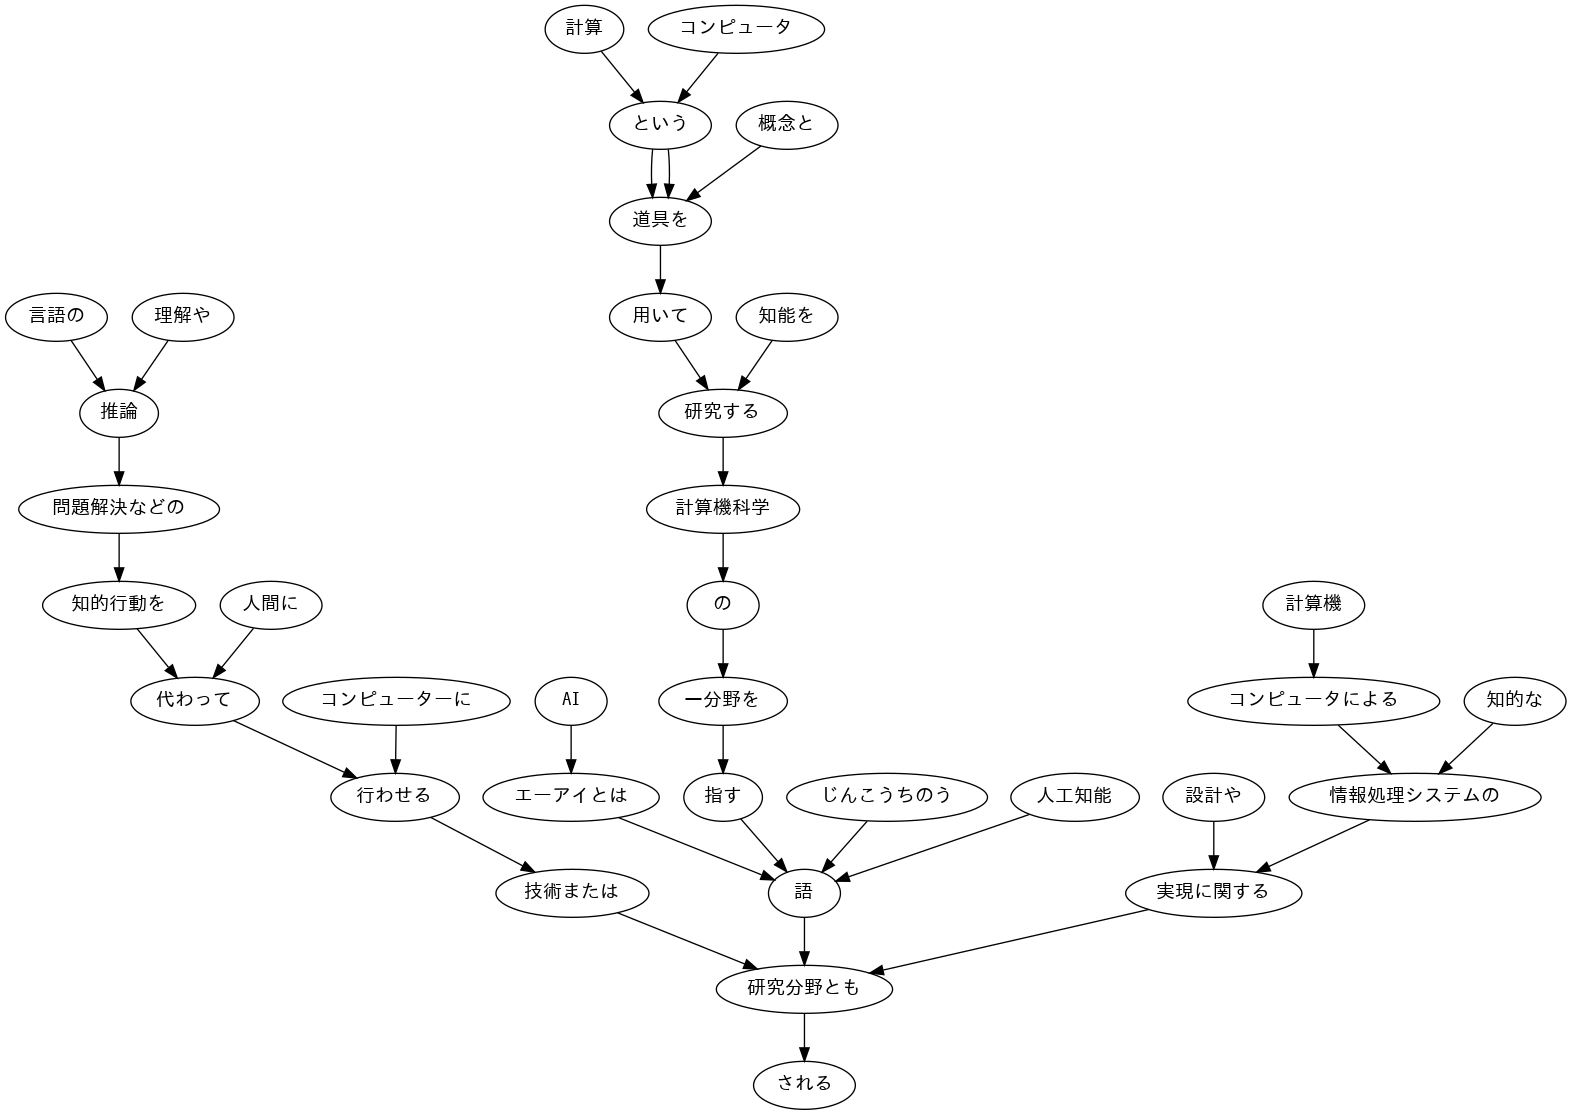

In [ ]:
pair = []
for chunk in sentences[2].chunks:
    if int(chunk.dst) != -1:
        surf = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
        next_surf = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) #文節のリストに係り先番号をindexに指定。その文節の形態素リストを取得
        pair.append((surf, next_surf)) # 係り元文節、係り先文節のペアをpairに追加

img = pydot.Dot() # Dotインスタンスを作成
img.set_node_defaults(fontname="MS Mincho") # 有効グラフのフォントを設定
for s, t in pair:
    # pydot.Dot.add_edge()メソッド：有効グラフにエッジを追加 # pydot.Edge(s, t)クラス：有効グラフを作成。第一引数にノードを指定、第二引数に第一引数で指定したノードに続くノードを作成
    img.add_edge(pydot.Edge(s, t))
img.write_png("44.png") # グラフをファイルに保存
display_png(Image('44.png'))

**45．動詞の格パターンの抽出**

今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

*   動詞を含む文節において，最左の動詞の基本形を述語とする
*   述語に係る助詞を格とする
*   述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

> 作り出す	で は を


このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
*   コーパス中で頻出する述語と格パターンの組み合わせ
*   「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [ ]:
with open("45.txt", "w") as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos == "動詞":  # 左から順に動詞を探す
                    cases = [] # 保存していた助詞をリセット
                    for src in chunk.srcs: # 見つけた動詞の係り元文節から助詞を探す
                        cases += [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == "助詞"] # 文節内の次の助詞が出現するまで、動詞にかかる助詞を保存
                    if len(cases) > 0: # 助詞があった場合
                        cases = sorted(list(set(cases))) # 重複を削除して辞書順にソート
                        form = " ".join(cases) # 助詞をスペース区切りで並べる
                        print(f"{morph.base}\t{form}", file=f)

In [ ]:
!cat 45.txt | sort | uniq -c | sort -nr | head -n 5

     49 する	を
     19 する	が
     15 する	に
     15 する	と
     12 する	は を


In [ ]:
!cat 45.txt |grep "行う" | sort |uniq -c | sort -nr |head -n 5

      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を


In [ ]:
!cat 45.txt |grep "なる" | sort |uniq -c | sort -nr |head -n 5

      4 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 異なる	も


In [ ]:
!cat 45.txt |grep "与える" | sort |uniq -c | sort -nr |head -n 5

      1 与える	に は を
      1 与える	が に
      1 与える	が など に


**46．動詞の格フレーム情報の抽出**

45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．



*   項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
*   述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

In [ ]:
with open("46.txt", "w") as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos == "動詞": # 左から順に動詞を探す
                    cases = [] # 保存していた助詞をリセット
                    items = [] # 保存していた項をリセット
                    for src in chunk.srcs: # 見つけた動詞の係り元文節から助詞と項を探す
                        cases += [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == "助詞"]
                        items += ["".join([morph.surface for morph in sentence.chunks[src].morphs if morph.pos != "記号"])] # 記号を除く
                    if len(cases) > 0:
                        if len(items) > 0: # 助詞と項が見つかった場合
                            cases = sorted(set(cases)) # 重複を削除して辞書順にソート
                            items = sorted(set(items))
                            cases_form = " ".join(cases) # 助詞をスペース区切りで並べる
                            items_form = " ".join(items) # 項をスペース区切りで並べる
                            print(f"{morph.base}\t{cases_form}\t{items_form}", file=f)

In [ ]:
!cat 46.txt | head -n 10

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	コンピューターに 代わって
せる	て に	コンピューターに 代わって
する	と も	研究分野とも
れる	と も	研究分野とも
述べる	で に の は	佐藤理史は 次のように 解説で
いる	で に の は	佐藤理史は 次のように 解説で


**47．機能動詞構文のマイニング**

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

*   「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
*   述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
*   述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
*   述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

> 学習を行う	に を	元に 経験を

In [ ]:
with open("47.txt", "w") as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            for morph in chunk.morphs:
                if morph.pos == "動詞": # 左から順に動詞を探す
                    for src in chunk.srcs:
                        predicates = [] # 保存していた述語をリセット
                        if len(sentence.chunks[src].morphs) == 2 and sentence.chunks[src].morphs[0].pos1 == "サ変接続" and sentence.chunks[src].morphs[1].surface == "を": # 「サ変接続名詞 + を（助詞）」で構成される文節を探す
                            predicates = "".join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base]) # 「サ変接続名詞 + を + 動詞の基本形」の形で predicates（述語）に保存
                            cases = [] # 保存していた助詞をリセット
                            items = [] # 保存していた項をリセット
                            for src in chunk.srcs: # 見つけた動詞の係り元文節から助詞と項を探す
                                cases += [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == "助詞"]
                                item = "".join([morph.surface for morph in sentence.chunks[src].morphs if morph.pos != "記号"])
                                if item not in predicates:
                                    items.append(item)
                            if len(cases) > 0: # 格と項が見つかった場合
                                if len(items) > 0:
                                    cases = sorted(set(cases)) # 重複を削除して辞書順にソート
                                    items = sorted(set(items))
                                    cases_form = " ".join(cases) # 助詞をスペース区切りで並べる
                                    items_form = " ".join(items) # 項をスペース区切りで並べる
                                    predicate = " ".join(predicates) # 述語をスペース区切りで並べる
                                    print(f"{predicates}\t{cases_form}\t{items_form}", file=f)

In [ ]:
!cat 47.txt | head -n 10

記述をする	と を	主体と
注目を集める	が を	ある その後 サポートベクターマシンが
経験を行う	に を	元に 学習を
学習を行う	に を	元に 経験を
進化を見せる	て において は を	加えて 敵対的生成ネットワークは 活躍している 特に 生成技術において
進化をいる	て において は を	加えて 敵対的生成ネットワークは 活躍している 特に 生成技術において
開発を行う	は を	エイダ・ラブレスは 製作した
処理を行う	を	適用し
処理をせる	を	適用し
意味をする	に を	データに


**48．名詞から根へのパスの抽出**

文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

*   各文節は（表層形の）形態素列で表現する
*   パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．


> ジョンマッカーシーは -> 作り出した

> AIに関する -> 最初の -> 会議で -> 作り出した

> 最初の -> 会議で -> 作り出した

> 会議で -> 作り出した

> 人工知能という -> 用語を -> 作り出した

> 用語を -> 作り出した


KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．


> ジョンマッカーシーは -> 作り出した

> ＡＩに -> 関する -> 会議で -> 作り出した

> 会議で -> 作り出した

> 人工知能と -> いう -> 用語を -> 作り出した

> 用語を -> 作り出した

In [ ]:
sentence = sentences[2]
for chunk in sentence.chunks:
    for morph in chunk.morphs:
        if "名詞" in morph.pos: # 文節内に名詞が含まれている場合
            path = ["".join(morph.surface for morph in chunk.morphs if morph.pos != "記号")] #文節内の単語を連結
            while chunk.dst != -1: # 係り先がある場合
                path.append("".join(morph.surface for morph in sentence.chunks[chunk.dst].morphs if morph.pos != "記号")) # 係り先文節の形態素列（表層系）をpathに追加
                chunk = sentence.chunks[chunk.dst] # 次のパスをたどる
            print(" -> ".join(path)) # path内の要素を矢印で連結

人工知能 -> 語 -> 研究分野とも -> される
される
じんこうちのう -> 語 -> 研究分野とも -> される
される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
される
される
一分野を -> 指す -> 語 -> 研究分野とも -> される
される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
される
人間に ->

**49．名詞間の係り受けパスの抽出**

文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj
（i<j
）のとき，係り受けパスは以下の仕様を満たすものとする．


*   問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
*   文節 i と j に含まれる名詞句はそれぞれ， X と Y に置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

*   文節 i から構文木の根に至る経路上に文節jが存在する場合: 文節 i から文節 j のパスを表示（ケース1）
*   上記以外で，文節 i と文節 j から構文木の根に至る経路上で共通の文節 k で交わる場合: 文節 i から文節kに至る直前のパスと文節 j から文節kに至る直前までのパス，文節kの内容を” | “で連結して表示（ケース2）



In [ ]:
from itertools import combinations
import re

sentence = sentences[2]
nouns = []
for i, chunk in enumerate(sentence.chunks):
    if [morph for morph in chunk.morphs if morph.pos == "名詞"]:
        nouns.append(i) # 名詞を含む文節のインデックス番号をnounsに格納
for i, j in combinations(nouns, 2): # itertools.combinations()：組み合わせを求める。第一引数に組み合わせを求めたい要素、第二引数に要素数を指定。
    path_i = [] # 名詞を含む文節の構文木経路を格納
    path_j = [] # 名詞を含む文節の構文木経路を格納
    while i != j:
        if i < j:
            path_i.append(i)
            i = sentence.chunks[i].dst
        else: # 文節iの係り受け構文木の経路上に文節jが含まれない場合
            path_j.append(j)
            j = sentence.chunks[j].dst

    if len(path_j) == 0: # ケース1
        # 名詞句をXとYに置換する
        X = "X" + "".join([morph.surface for morph in sentence.chunks[path_i[0]].morphs if morph.pos != "名詞" and morph.pos != "記号"])
        Y = "Y" + "".join([morph.surface for morph in sentence.chunks[i].morphs if morph.pos != "名詞" and morph.pos != "記号"])
        chunk_X = re.sub("X+", "X", X)
        chunk_Y = re.sub("Y+", "Y", Y)
        # 文節iと文節jの間のパスを取得し、矢印で連結
        path_ItoJ = [chunk_X] + ["".join(morph.surface for morph in sentence.chunks[n].morphs if morph.pos != "記号") for n in path_i[1:]] + [chunk_Y]
        print(" -> ".join(path_ItoJ))
    else: # ケース2
        # 名詞句をXとYに置換する
        X = "X" + "".join([morph.surface for morph in sentence.chunks[path_i[0]].morphs if morph.pos != "名詞" and morph.pos != "記号"])
        Y = "Y" + "".join([morph.surface for morph in sentence.chunks[path_j[0]].morphs if morph.pos != "名詞" and morph.pos != "記号"])
        chunk_X = re.sub("X+", "X", X)
        chunk_Y = re.sub("Y+", "Y", Y)
        # 文節iと文節jから構文木の根に至る経路上で交わる文節kを取得
        chunk_k = "".join([morph.surface for morph in sentence.chunks[i].morphs if morph.pos != "記号"])
        # 文節iから文節kに至るまでのパスを取得
        path_X = [chunk_X] + ["".join(morph.surface for morph in sentence.chunks[n].morphs if morph.pos != "記号") for n in path_i[1:]]
        # 文節jから文節kに至るまでのパスを取得
        path_Y = [chunk_Y] + ["".join(morph.surface for morph in sentence.chunks[n].morphs if morph.pos != "記号") for n in path_j[1:]]
        # ”|”で連結させて出力
        print(" | ".join([" -> ".join(path_X), " -> ".join(path_Y), chunk_k]))

X | Yのう | 語
X | Y -> エーアイとは | 語
X | Yとは | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yする -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> の -> 一分野を -> 指す | 語
X | Yを -> 指す | 語
X -> Y
X -> 語 | Yの -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yや -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Y -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yを -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yまたは | 研究分野とも
X -> 語 | Y -> コンピュータによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yな -> 情報処理システムの -> 実現に関する | 研究分野とも
X 